# 🎬 Netflix İçerik Analizi: Tür, Ülke ve Yayın Yılına Göre Dağılım

Bu analizde, Netflix platformunda yer alan içeriklerin türlerine, yayınlandıkları ülkelere ve zaman içindeki dağılımlarına odaklanılmıştır. Kullanılan veri seti [Netflix Titles Dataset](https://www.kaggle.com/datasets/shivamb/netflix-shows) olup, yapım türleri, ülkeler, içerik kategorileri gibi çeşitli nitelikler üzerinden incelenmiştir.

🔍 **Amaçlar:**
- En çok içerik üretilen ülkeyi belirlemek
- Türlerin popülerlik düzeylerini incelemek
- En çok içerik üretilen ülkelerin hangi tür içerikler ürettiğini gözlemlemek

Bu analiz, içerik stratejilerini anlamak ve Netflix'in küresel yayılımına dair temel veriler sunmayı hedeflemektedir.


In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [25]:
df = pd.read_csv("netflix_titles.csv")

In [26]:
df.describe

<bound method NDFrame.describe of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail M

In [27]:
df.info

<bound method DataFrame.info of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mab

In [28]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [29]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# Kolonlarımız (Değişkenlerimiz)
* show_id
* type
* title
* director
* cast
* country
* date_added
* release_year
* rating
* duration
* listed_in
* description

Bizim yaptığımız inceleme type, country ve date_added değişkenleri ile çalışıyoruz. bu değişkenleri doldurmamız mümkün olmadığından bunları çalışmamızdan çıkardık

In [30]:
df = df.query("country.notna() and date_added.notna() and type.notna()")
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [31]:
df["date_added"] = pd.to_datetime(df["date_added"],errors="coerce")
df["added_year"] = df["date_added"].dt.year
df

C:\Users\ozsat\AppData\Local\Temp\ipykernel_14728\1759595576.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date_added"] = pd.to_datetime(df["date_added"],errors="coerce")
C:\Users\ozsat\AppData\Local\Temp\ipykernel_14728\1759595576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date_added"] = pd.to_datetime(df["date_added"],errors="coerce")
C:\Users\ozsat\AppData\Local\Temp\ipykernel_14728\1759595576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020


Ekleme Yılları içerisindeki eksik veriler tamamlanamaycağı için bunları çalışmamızın dışında bıraktık.

In [32]:
df = df.query("added_year.notna()")
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021


# 📊Yıllara göre çıkış yapan dizi sayısı

<BarContainer object of 10 artists>

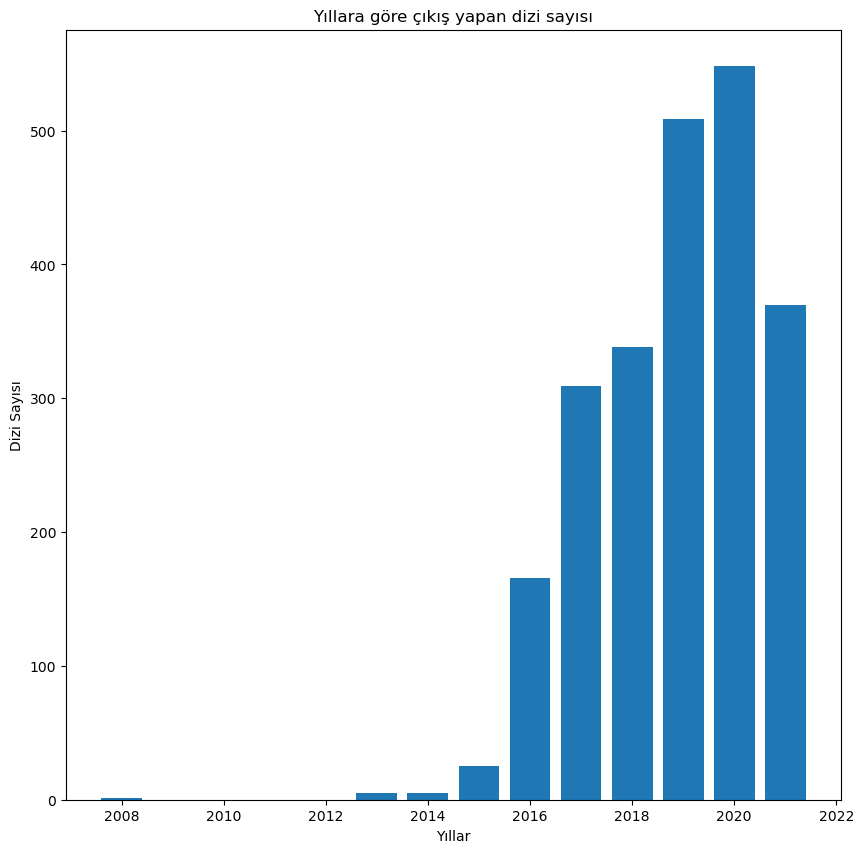

In [33]:
plt.figure(figsize=(10,10))

plt.title("Yıllara göre çıkış yapan dizi sayısı")
plt.xlabel("Yıllar")
plt.ylabel("Dizi Sayısı")

plt.bar(df.query("type == 'TV Show'")["added_year"].value_counts().index,
        df.query("type == 'TV Show'")["added_year"].value_counts().values)

# 📊Yıllara göre çıkış yapan film sayısı

<BarContainer object of 14 artists>

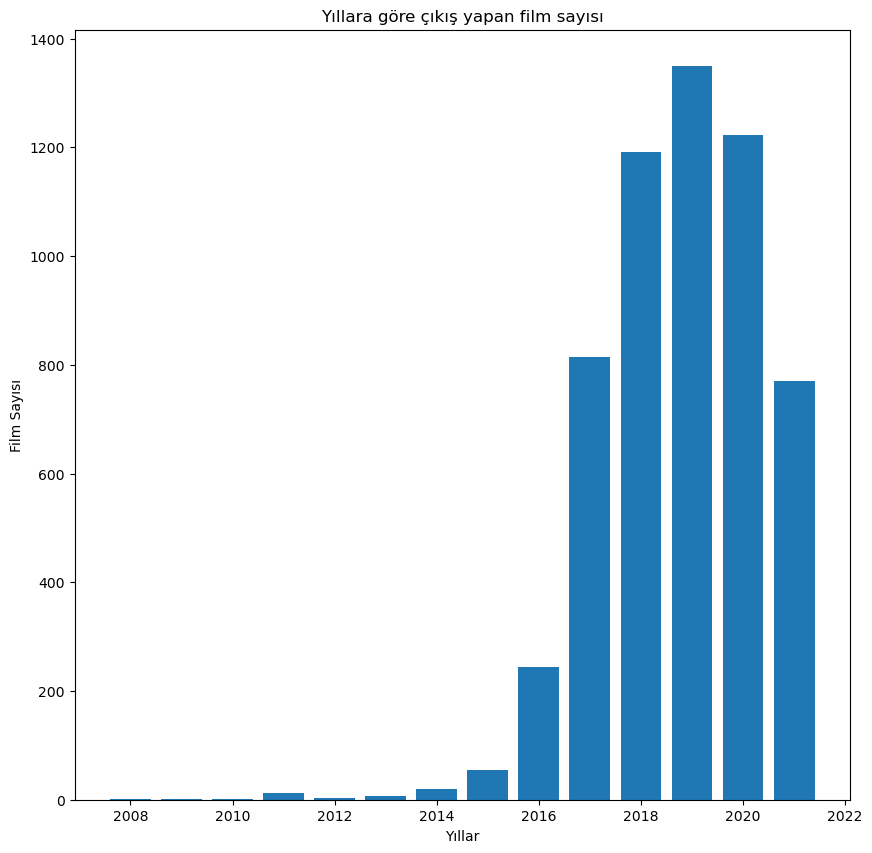

In [34]:
plt.figure(figsize=(10,10))

plt.title("Yıllara göre çıkış yapan film sayısı")
plt.xlabel("Yıllar")
plt.ylabel("Film Sayısı")

plt.bar(df.query("type == 'Movie'")["added_year"].value_counts().index,
        df.query("type == 'Movie'")["added_year"].value_counts().values)

# 📊En çok içerik üreten 10 ülke ve ürettikleri içerik sayıları

<BarContainer object of 10 artists>

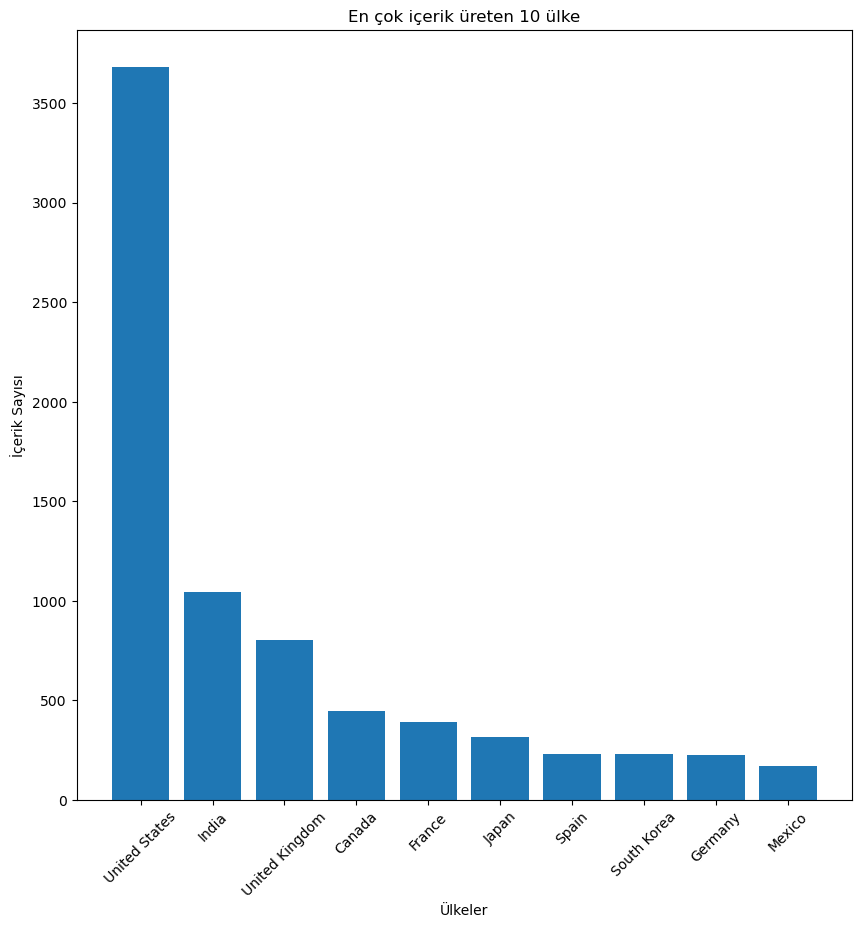

In [35]:
plt.figure(figsize=(10,10))

plt.xticks(rotation=45)

plt.title("En çok içerik üreten 10 ülke")
plt.xlabel("Ülkeler")
plt.ylabel("İçerik Sayısı")

plt.bar((df["country"].str.split(", ").explode().value_counts().index)[0:10],
        (df["country"].str.split(", ").explode().value_counts().values)[0:10])

# 📊En çok üretilen 10 içerik türü ve üretim miktarları

<BarContainer object of 10 artists>

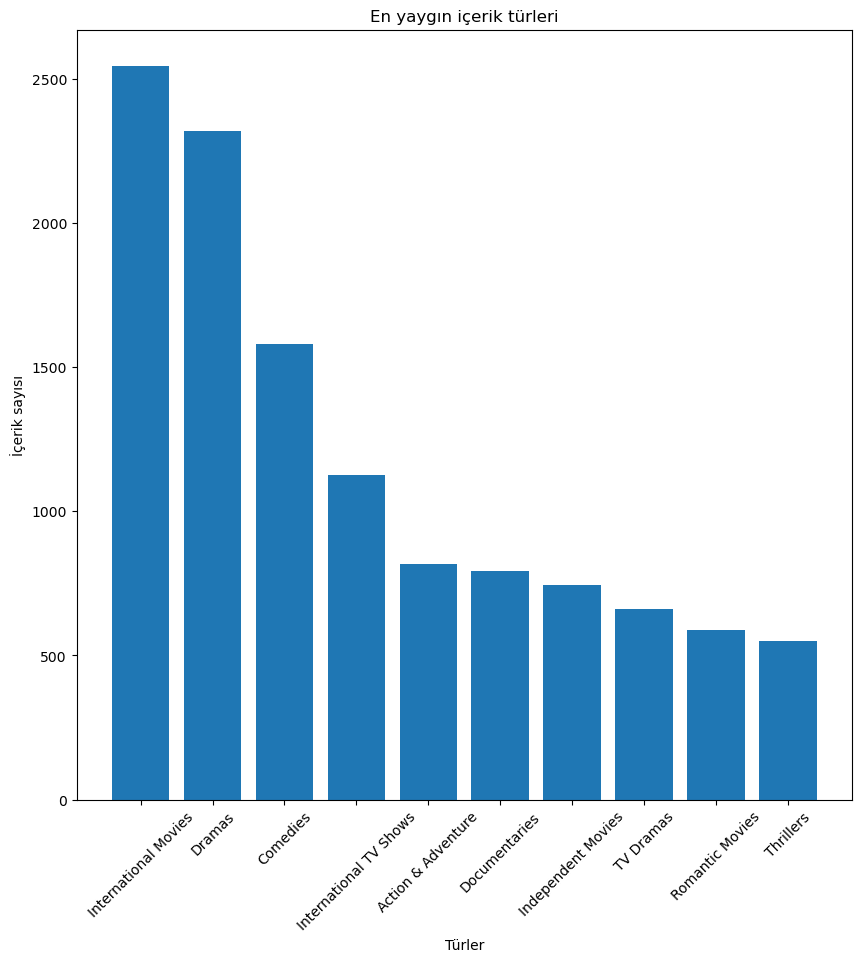

In [36]:
plt.figure(figsize=(10,10))

plt.xticks(rotation=45)
plt.title("En yaygın içerik türleri")
plt.xlabel("Türler")
plt.ylabel("İçerik sayısı")

plt.bar((df["listed_in"].str.split(", ").explode().value_counts().index)[0:10],
       (df["listed_in"].str.split(", ").explode().value_counts().values)[0:10])

# 📊United States için en yaygın içerik türleri ve bu türler için yapım sayısı

<BarContainer object of 10 artists>

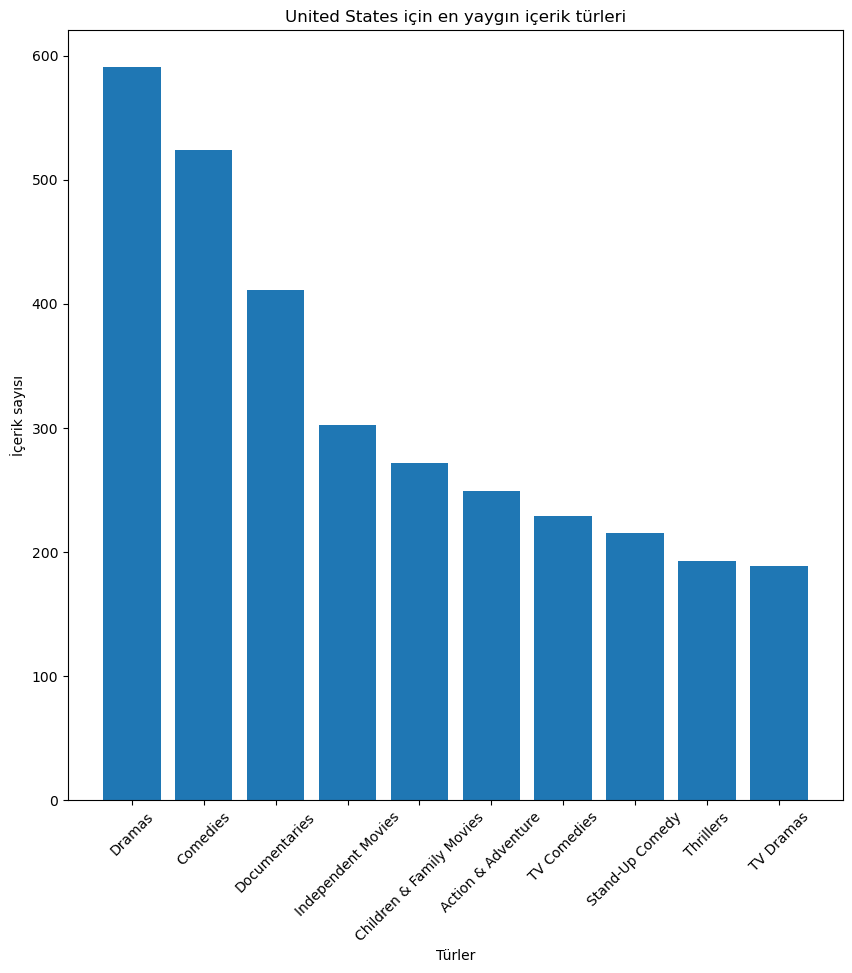

In [37]:
plt.figure(figsize=(10,10))

plt.xticks(rotation=45)
plt.title("United States için en yaygın içerik türleri")
plt.xlabel("Türler")
plt.ylabel("İçerik sayısı")

plt.bar((df.query("country == 'United States'")["listed_in"].str.split(", ").explode().value_counts().index)[0:10],
       (df.query("country == 'United States'")["listed_in"].str.split(", ").explode().value_counts().values)[0:10])

# 📊India için en yaygın içerik türleri ve bu türler için yapım sayısı¶

<BarContainer object of 10 artists>

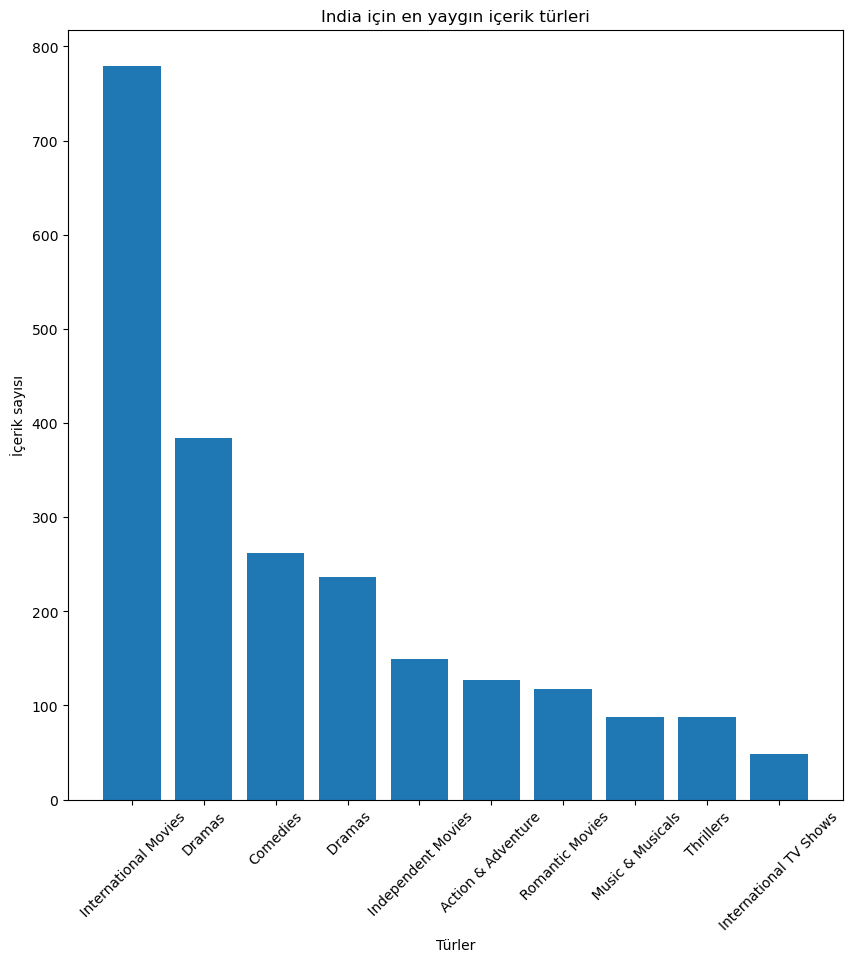

In [38]:
plt.figure(figsize=(10,10))

plt.xticks(rotation=45)
plt.title("India için en yaygın içerik türleri")
plt.xlabel("Türler")
plt.ylabel("İçerik sayısı")

plt.bar((df.query("country == 'India'")["listed_in"].str.split(",").explode().value_counts().index)[0:10],
       (df.query("country == 'India'")["listed_in"].str.split(",").explode().value_counts().values)[0:10])

# 📊United Kingdom için en yaygın içerik türleri ve bu türler için yapım sayısı

<BarContainer object of 10 artists>

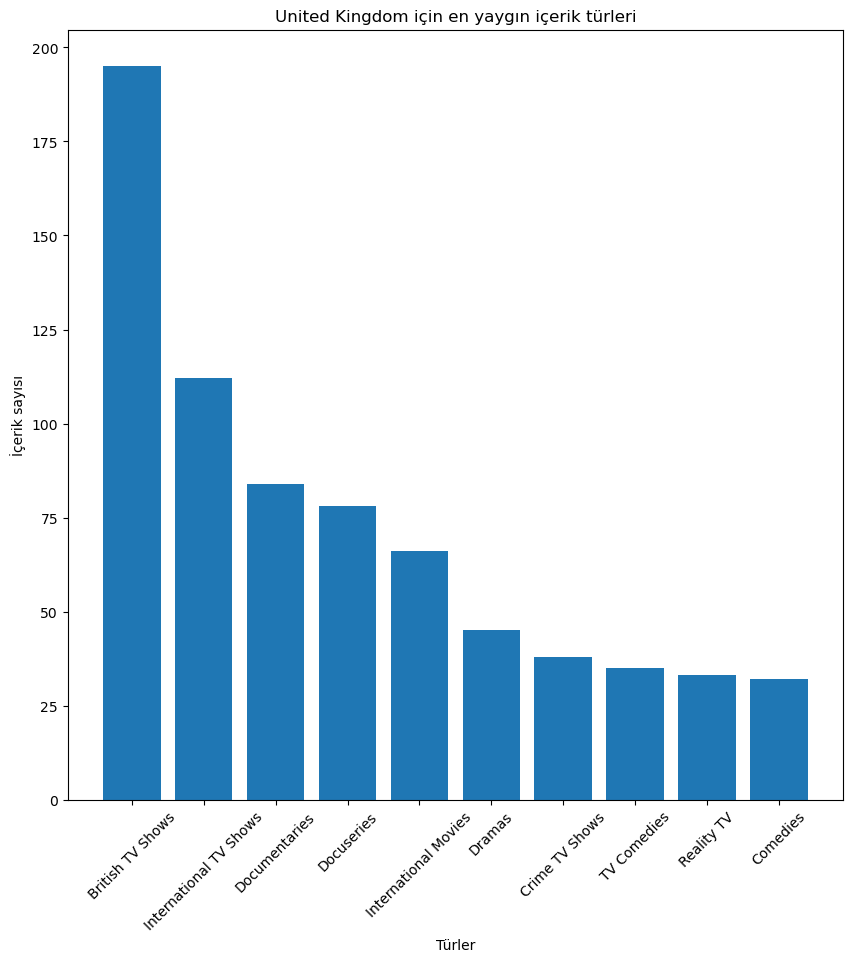

In [39]:
plt.figure(figsize=(10,10))

plt.xticks(rotation=45)
plt.title("United Kingdom için en yaygın içerik türleri")
plt.xlabel("Türler")
plt.ylabel("İçerik sayısı")

plt.bar((df.query("country == 'United Kingdom'")["listed_in"].str.split(", ").explode().value_counts().index)[0:10],
       (df.query("country == 'United Kingdom'")["listed_in"].str.split(", ").explode().value_counts().values)[0:10])

# 📊Canada için en yaygın içerik türleri ve bu türler için yapım sayısı

<BarContainer object of 10 artists>

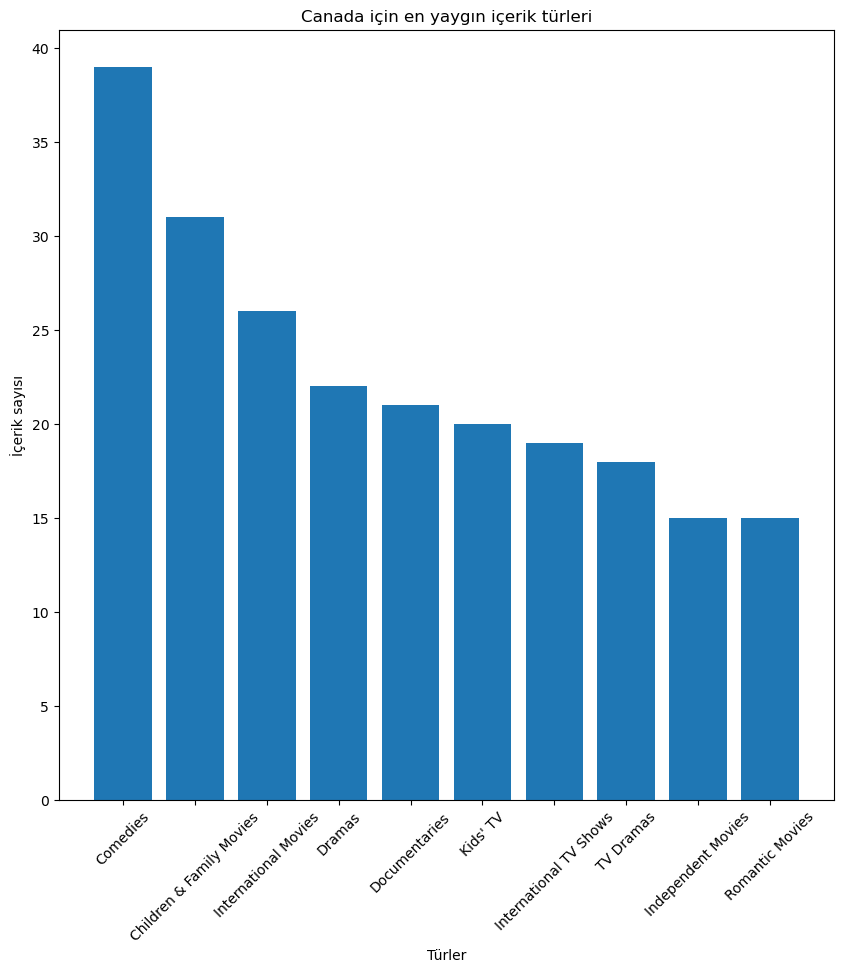

In [40]:
plt.figure(figsize=(10,10))

plt.xticks(rotation=45)
plt.title("Canada için en yaygın içerik türleri")
plt.xlabel("Türler")
plt.ylabel("İçerik sayısı")

plt.bar((df.query("country == 'Canada'")["listed_in"].str.split(", ").explode().value_counts().index)[0:10],
       (df.query("country == 'Canada'")["listed_in"].str.split(", ").explode().value_counts().values)[0:10])

# 📊France için en yaygın içerik türleri ve bu türler için yapım sayısı

<BarContainer object of 10 artists>

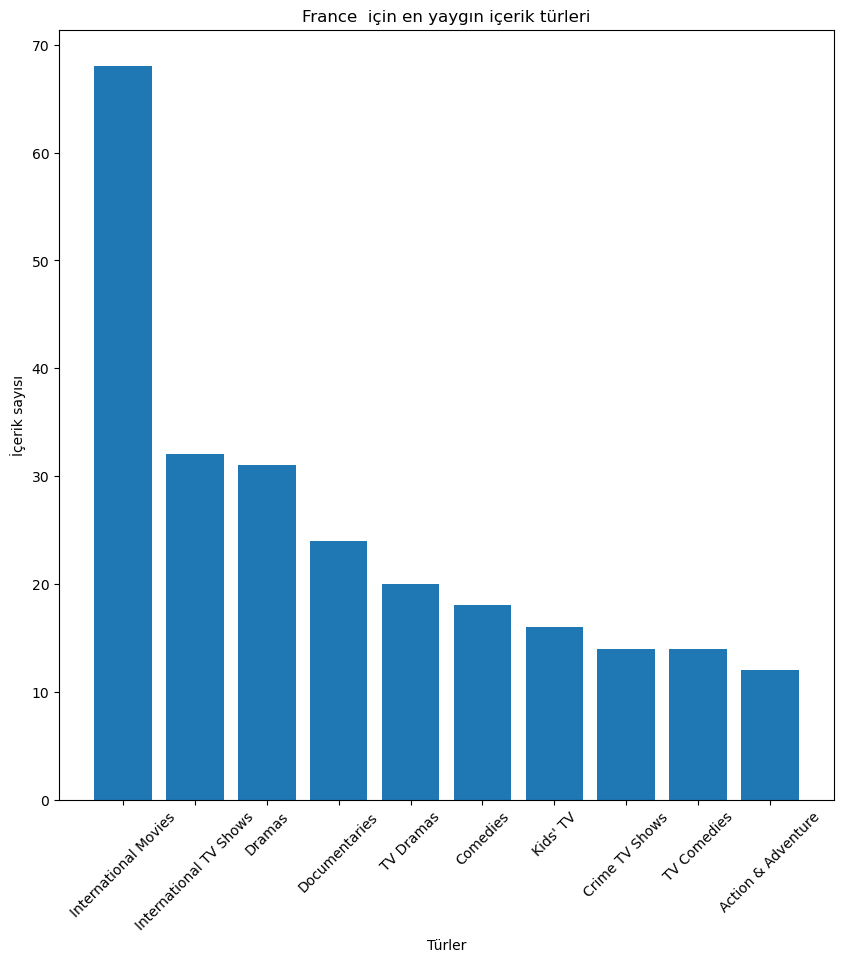

In [41]:
plt.figure(figsize=(10,10))

plt.xticks(rotation=45)
plt.title("France  için en yaygın içerik türleri")
plt.xlabel("Türler")
plt.ylabel("İçerik sayısı")

plt.bar((df.query("country == 'France'")["listed_in"].str.split(", ").explode().value_counts().index)[0:10],
       (df.query("country == 'France'")["listed_in"].str.split(", ").explode().value_counts().values)[0:10])

# 📊Japan için en yaygın içerik türleri ve bu türler için yapım sayısı

<BarContainer object of 10 artists>

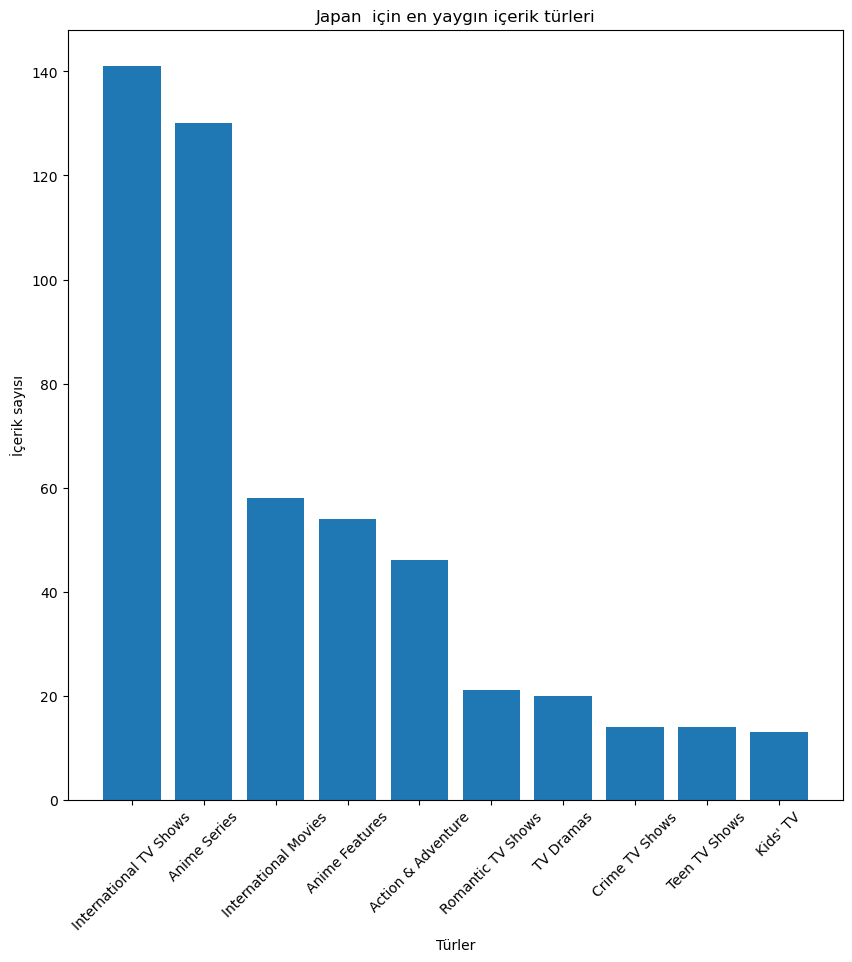

In [42]:
plt.figure(figsize=(10,10))

plt.xticks(rotation=45)
plt.title("Japan  için en yaygın içerik türleri")
plt.xlabel("Türler")
plt.ylabel("İçerik sayısı")

plt.bar((df.query("country == 'Japan'")["listed_in"].str.split(", ").explode().value_counts().index)[0:10],
       (df.query("country == 'Japan'")["listed_in"].str.split(", ").explode().value_counts().values)[0:10])

# 📊Spain için en yaygın içerik türleri ve bu türler için yapım sayısı

<BarContainer object of 10 artists>

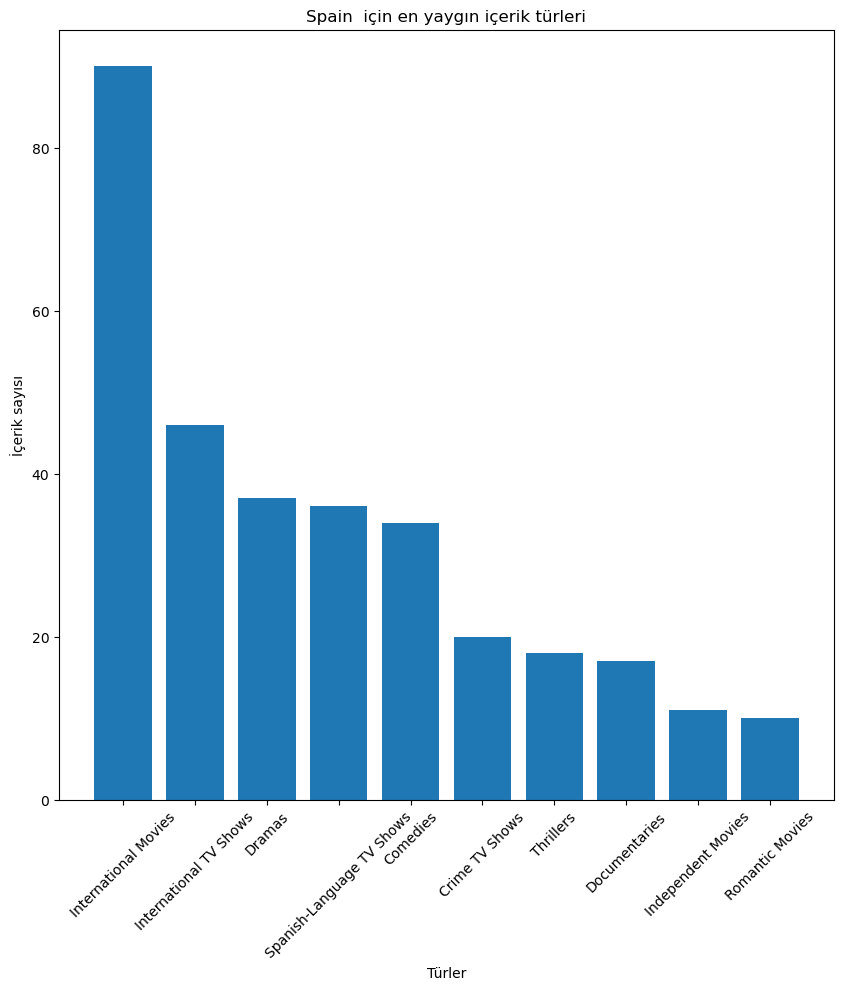

In [43]:
plt.figure(figsize=(10,10))

plt.xticks(rotation=45)
plt.title("Spain  için en yaygın içerik türleri")
plt.xlabel("Türler")
plt.ylabel("İçerik sayısı")

plt.bar((df.query("country == 'Spain'")["listed_in"].str.split(", ").explode().value_counts().index)[0:10],
       (df.query("country == 'Spain'")["listed_in"].str.split(", ").explode().value_counts().values)[0:10])

# 📊South Korea için en yaygın içerik türleri ve bu türler için yapım sayısı

<BarContainer object of 10 artists>

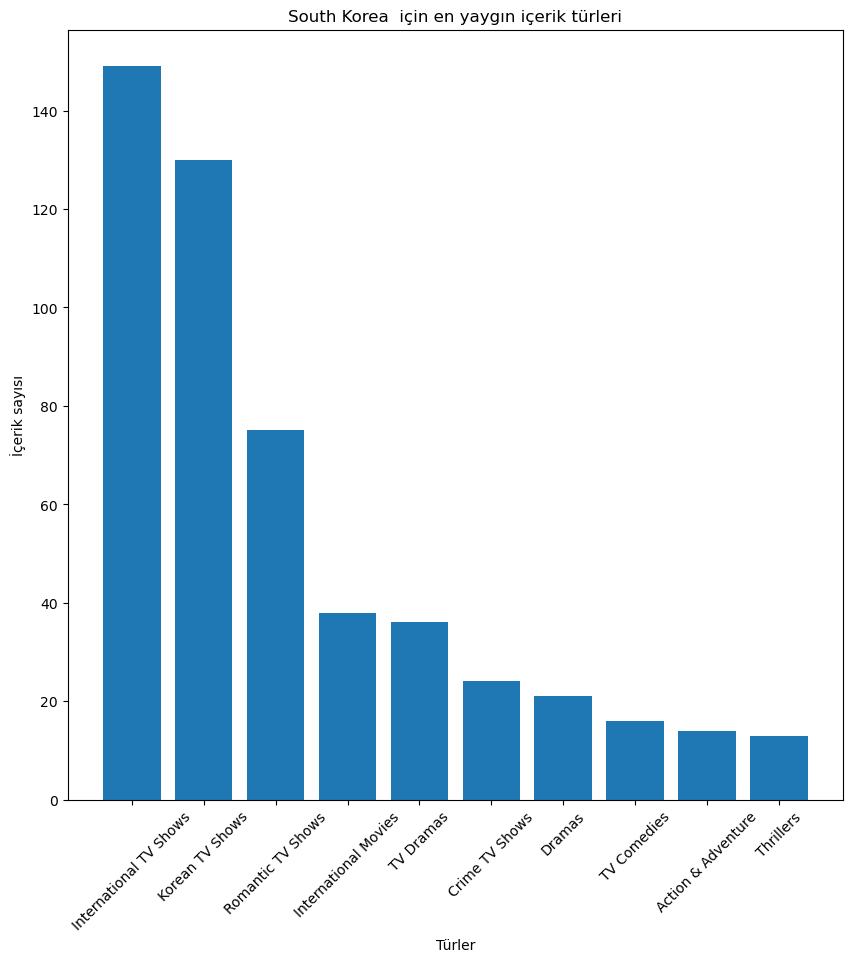

In [44]:
plt.figure(figsize=(10,10))

plt.xticks(rotation=45)
plt.title("South Korea  için en yaygın içerik türleri")
plt.xlabel("Türler")
plt.ylabel("İçerik sayısı")

plt.bar((df.query("country == 'South Korea'")["listed_in"].str.split(", ").explode().value_counts().index)[0:10],
       (df.query("country == 'South Korea'")["listed_in"].str.split(", ").explode().value_counts().values)[0:10])

# 📊German için en yaygın içerik türleri ve bu türler için yapım sayısı

<BarContainer object of 10 artists>

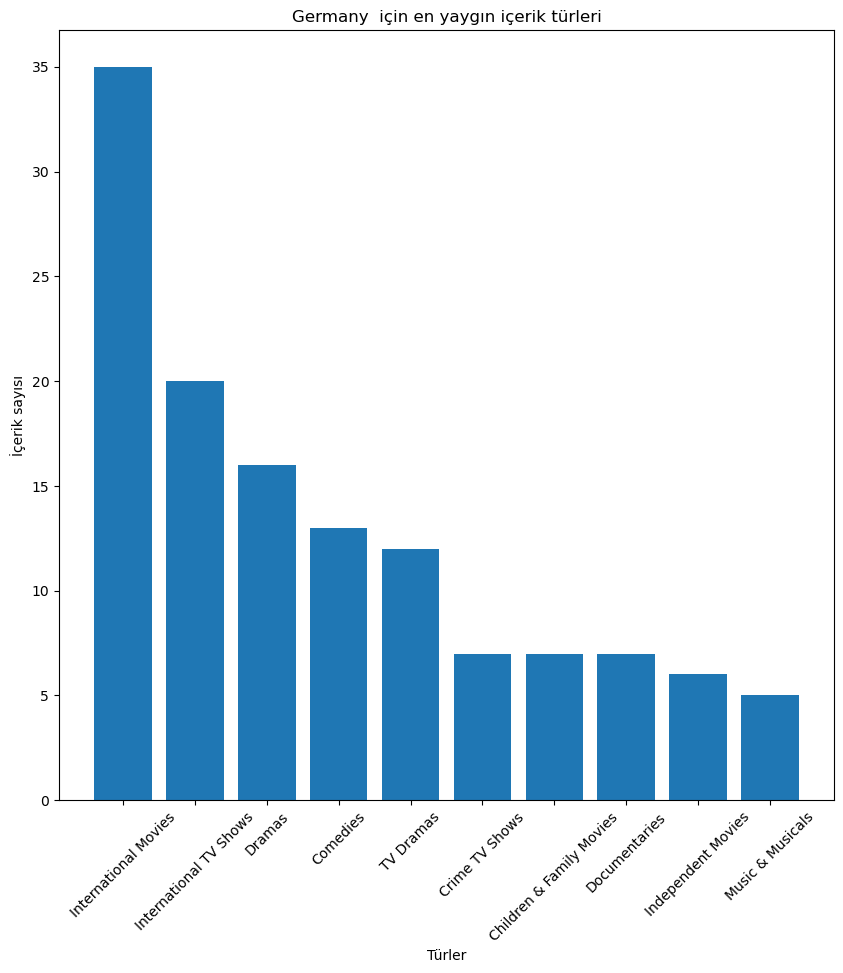

In [45]:
plt.figure(figsize=(10,10))

plt.xticks(rotation=45)
plt.title("Germany  için en yaygın içerik türleri")
plt.xlabel("Türler")
plt.ylabel("İçerik sayısı")

plt.bar((df.query("country == 'Germany'")["listed_in"].str.split(", ").explode().value_counts().index)[0:10],
       (df.query("country == 'Germany'")["listed_in"].str.split(", ").explode().value_counts().values)[0:10])

# 📊Mexico için en yaygın içerik türleri ve bu türler için yapım sayısı

<BarContainer object of 10 artists>

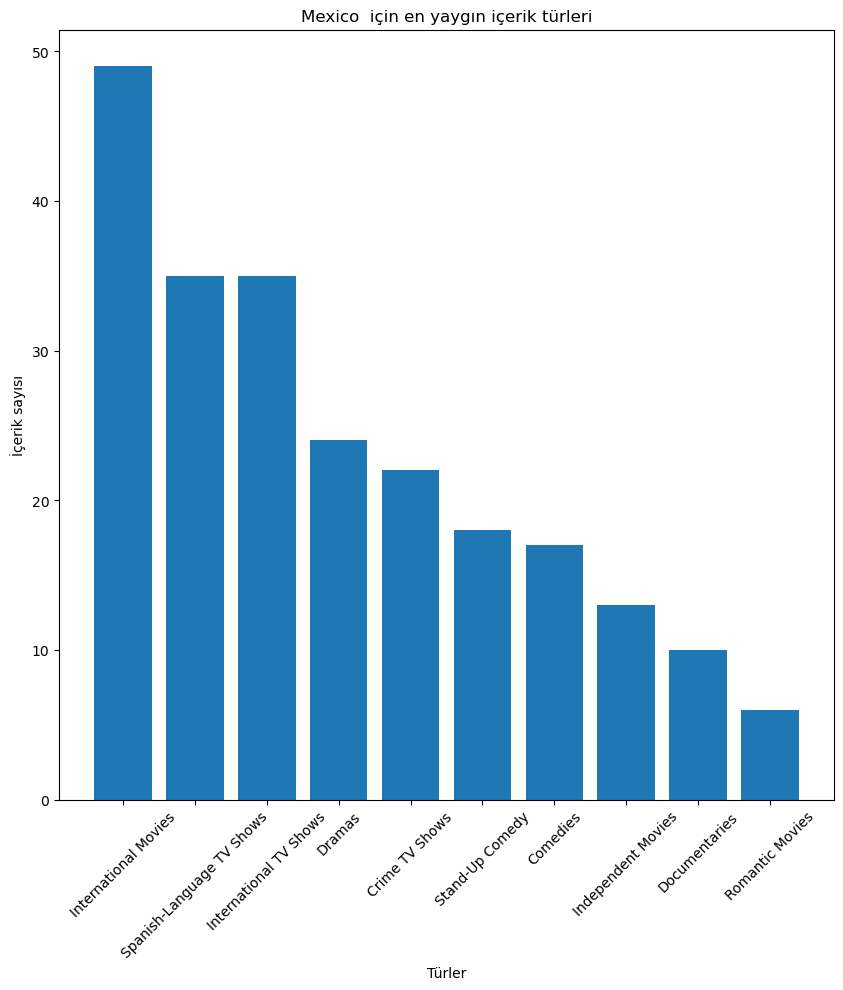

In [46]:
plt.figure(figsize=(10,10))

plt.xticks(rotation=45)
plt.title("Mexico  için en yaygın içerik türleri")
plt.xlabel("Türler")
plt.ylabel("İçerik sayısı")

plt.bar((df.query("country == 'Mexico'")["listed_in"].str.split(", ").explode().value_counts().index)[0:10],
       (df.query("country == 'Mexico'")["listed_in"].str.split(", ").explode().value_counts().values)[0:10])

# ✅ Sonuçlar ve Gözlemler

Yapılan analiz sonucunda aşağıdaki bulgulara ulaşılmıştır:

- 🌍 **En çok içerik üreten ülke**: Amerika Birleşik Devletleri açık ara en fazla içeriğe sahip ülkedir.
- 🎭 **En popüler içerik türleri**: Drama, International Movies ve Comedies türleri ön plana çıkmaktadır.
- 📅 **Yıllara göre yayın eğilimi**: İçerik üretiminde 2017–2020 yılları arasında belirgin bir artış gözlemlenmiştir.
- 🧾 **Birden fazla ülke/tür etiketi** içeren içerikler sayesinde, Netflix’in global yapım ortaklıkları net şekilde ortaya çıkmaktadır.

📌 Bu çalışma, Netflix’in içerik stratejilerinin ülkeler ve türler bazında nasıl şekillendiğini anlamak için temel bir bakış sağlamaktadır. Daha derin analizler için IMDb puanları, süre bilgisi ve içerik açıklamaları da değerlendirilebilir.
